In [2]:
from copyreg import remove_extension
from email import header
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import os

from CSIKit.util import byteops
from CSIKit.reader import NEXBeamformReader
from CSIKit.tools.batch_graph import BatchGraph
from CSIKit.util.filters import running_mean
from CSIKit.util import csitools
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
import csi_analysis
import statistics
import threading
from cryptography.fernet import Fernet 
import base64
from Crypto.Cipher import AES
from math import dist

In [4]:
df_train = csi_analysis.csi_analyzer(csi_file_name='client_profile.pcap')
x_train = csi_analysis.train_process(df_train)
df_test = csi_analysis.csi_analyzer(csi_file_name='live_test.pcap')
x_test = csi_analysis.test_process(df_test)
authenticator = csi_analysis.gen_authenticator(x_train)

In [5]:
var = csi_analysis.var_cal(df_train)
print(var)

0.9685675004260207


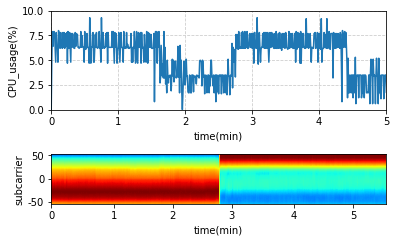

In [433]:
index=[]

text_file = open("./csi_crypto_results_new/loc_change/cpu_client_time.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]
for i in range(len(cpu_new)):
    index.append(10*i)


fig, (plot1,plot2) = plt.subplots(2,1)

plot1.plot(index,cpu_new)
plot1.grid(axis='both', color = '0.8', linestyle = '--')

plot1.set_ylim((0,10))
plot1.set_xlim((0,6000))
plot1.set_ylabel('CPU_usage(%)')
plot1.set_xlabel('time(min)')
plot1.set_xticks([0,1200,2400,3600,4800,6000],[0,1,2,3,4,5])


csi_matrix2 = np.loadtxt(open("./csi_crypto_results_new/loc_change/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='7.05',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('time(min)')
plot2.set_xlim((0,5100))
plot2.set_xticks([0,950,1850,2750,3700,4600],['0','1','2','3','4','5'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()

plt.savefig('loc_change.png',dpi=500)
plt.show()


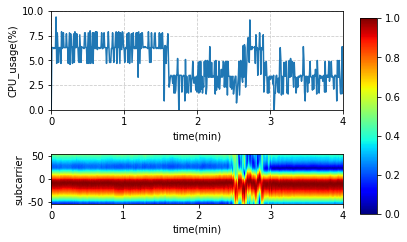

In [760]:
index=[]

text_file = open("./csi_crypto_results_new/env_disturbance/cpu_client_time.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]
for i in range(len(cpu_new)):
    index.append(10*i)


fig, (plot1,plot2) = plt.subplots(2,1)

plot1.plot(index,cpu_new)
plot1.grid(axis='both', color = '0.8', linestyle = '--')

plot1.set_ylim((0,10))
plot1.set_xlim((0,4800))
plot1.set_ylabel('CPU_usage(%)')
plot1.set_xlabel('time(min)')
plot1.set_xticks([0,1200,2400,3600,4800],[0,1,2,3,4])


csi_matrix2 = np.loadtxt(open("./csi_crypto_results_new/env_disturbance/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


im = plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='6.05',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('time(min)')
plot2.set_xlim((0,3850))
plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()

# plt.savefig('env_disturb.png',dpi=500)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.175, 0.04, 0.68])
fig.colorbar(im,cax=cbar_ax)
plt.savefig('env_disturb.png',dpi=500)
plt.show()

# all_1 = []
# for i in range(1100,1400):
#     # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
#     dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
#     all_1.append(dis)

# plt.plot(all_1,'r',marker = 'o', label = 'd(profile, testing_no moving)')

# all = []
# for i in range(3000,3300):
#     # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
#     dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
#     all.append(dis)
# plt.plot(all, marker = 'o',label = 'd(profile, testing_moving around)')

# plt.show()


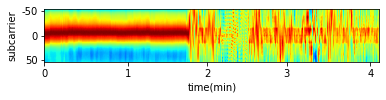

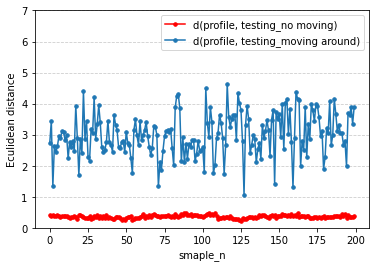

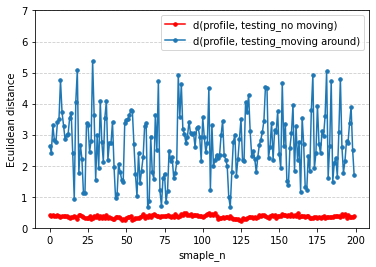

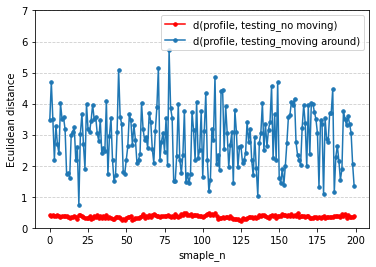

In [477]:
index=[]

text_file = open("./csi_crypto_results_new/loc_change/cpu_client_time.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]
for i in range(len(cpu_new)):
    index.append(10*i)



csi_matrix2 = np.loadtxt(open("./moving_exp/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


plt.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='5.55',vmin=0,vmax=1)
plt.ylabel('subcarrier')
plt.xlabel('time(min)')
plt.xlim((0,3800))
plt.xticks([0,950,1850,2750,3700],['0','1','2','3','4'])
plt.yticks([4,54,104],[-50,0,50])
# plt.invert_yaxis()

# plt.savefig('mov_change.png',dpi=500)
plt.show()

all_1 = []
for i in range(1400,1600):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r',marker = 'o',markersize = 3.5,label = 'd(profile, testing_no moving)')

all = []
for i in range(2100,2300):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all, marker = 'o',markersize = 3.5,label = 'd(profile, testing_moving around)')
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
# plt.savefig('mov1.png', dpi=500)
plt.show()

all_1 = []
for i in range(1400,1600):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r',marker = 'o',markersize = 3.5, label = 'd(profile, testing_no moving)')

all = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all, marker = 'o',markersize = 3.5,label = 'd(profile, testing_moving around)')
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
# plt.savefig('mov2.png', dpi=500)
plt.show()

all_1 = []
for i in range(1400,1600):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', marker = 'o',markersize = 3.5,label = 'd(profile, testing_no moving)')

all = []
for i in range(3200,3400):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,marker = 'o',markersize = 3.5,label = 'd(profile, testing_moving around)', linestyle = '-')
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
# plt.savefig('mov3.png', dpi=500)
plt.show()

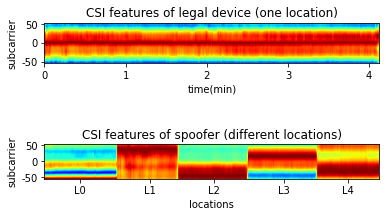

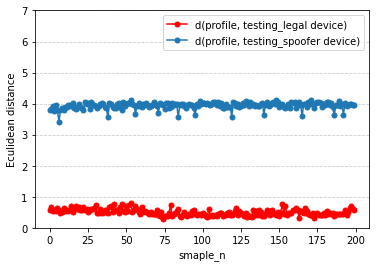

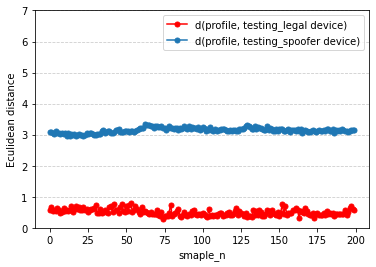

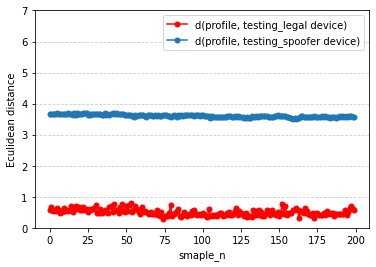

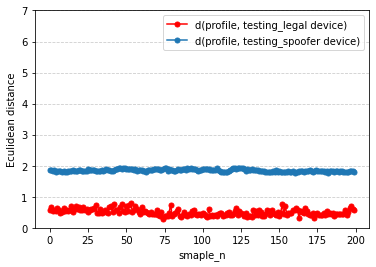

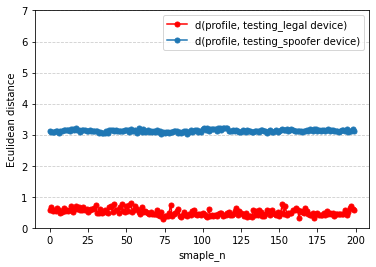

In [581]:
# index=[]

# text_file = open("./csi_crypto_results_new/env_disturbance/cpu_client_time.txt", "r")
# cpu = text_file.read().split('\n')
# cpu_new = [float(x) for x in cpu]
# for i in range(len(cpu_new)):
#     index.append(10*i)


fig, (plot1,plot2) = plt.subplots(2,1)

# plot1.plot(index,cpu_new)
# plot1.grid(axis='both', color = '0.8', linestyle = '--')
csi_matrix1 = np.loadtxt(open("./exp2/csi_data_all_legal.csv", "rb"), delimiter=",", skiprows=1)

plot1.imshow(np.transpose(csi_matrix1), cmap='jet' ,aspect='3.7',vmin=0,vmax=1)
plot1.set_ylabel('subcarrier')
plot1.set_xlabel('time(min)')
plot1.set_xlim((0,3300))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
plot1.set_xticks([0,800,1600,2400,3200],[0,1,2,3,4])
plot1.set_yticks([4,54,104],[-50,0,50])
plot1.invert_yaxis()
plot1.set_title('CSI features of legal device (one location)')


csi_matrix2 = np.loadtxt(open("./exp2/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='9.05',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('locations')
plot2.set_xlim((0,9500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()
plot2.set_title('CSI features of spoofer (different locations)')

plt.savefig('spoofer_5l.png',dpi=500)
plt.show()

all_1 = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all = []
for i in range(850,1050):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_spoofer device)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_loc1.png', dpi=500)
plt.show()


all_1 = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all = []
for i in range(2900,3100):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_spoofer device)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_loc2.png', dpi=500)
plt.show()

all_1 = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all = []
for i in range(4700,4900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_spoofer device)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_loc3.png', dpi=500)
plt.show()

all_1 = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all = []
for i in range(6700,6900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_spoofer device)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_loc4.png', dpi=500)
plt.show()


all_1 = []
for i in range(2300,2500):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all = []
for i in range(8700,8900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_spoofer device)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_loc5.png', dpi=500)
plt.show()




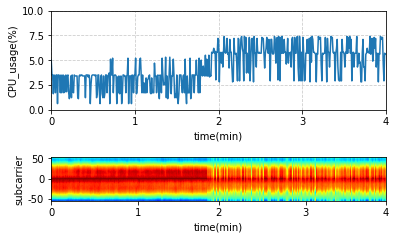

In [667]:
index=[]

text_file = open("./exp2/cpu_client_time_combine.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]
for i in range(len(cpu_new)):
    index.append(10*i)


fig, (plot1,plot2) = plt.subplots(2,1)

# plot1.plot(index,cpu_new)
# plot1.grid(axis='both', color = '0.8', linestyle = '--')
# csi_matrix1 = np.loadtxt(open("./exp2/csi_data_all_legal.csv", "rb"), delimiter=",", skiprows=1)
csi_matrix2 = np.loadtxt(open("./exp2/csi_data_combined.csv", "rb"), delimiter=",", skiprows=1)


plot1.plot(index,cpu_new)
plot1.grid(axis='both', color = '0.8', linestyle = '--')

plot1.set_ylim((0,10))
plot1.set_xlim((0,4600))
plot1.set_ylabel('CPU_usage(%)')
plot1.set_xlabel('time(min)')
plot1.set_xticks([0,1200,2400,3600,4800],[0,1,2,3,4])


plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='3.05',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('time(min)')
plot2.set_xlim((0,2500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
plot2.set_xticks([0,650,1250,1900,2500],['0','1','2','3','4'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()
# plot2.set_title('CSI features of spoofer')
# plot2.set_title('')

# plt.savefig('spoofer_in.png',dpi=500)
plt.show()

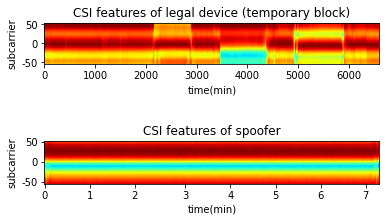

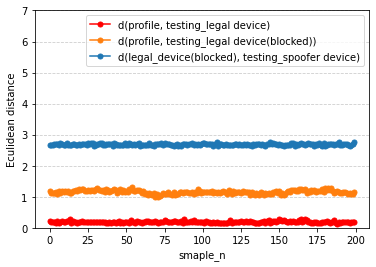

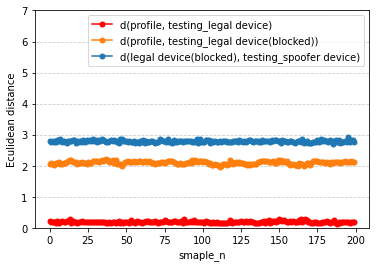

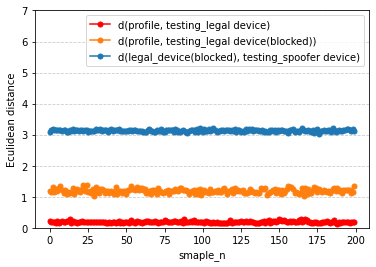

In [178]:

fig, (plot1,plot2) = plt.subplots(2,1)

# plot1.plot(index,cpu_new)
# plot1.grid(axis='both', color = '0.8', linestyle = '--')
csi_matrix1 = np.loadtxt(open("./exp3/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)
csi_matrix2 = np.loadtxt(open("./exp3/csi_data_all_spoofer.csv", "rb"), delimiter=",", skiprows=1)


plot1.imshow(np.transpose(csi_matrix1), cmap='jet' ,aspect='7.5',vmin=0,vmax=1)
plot1.set_ylabel('subcarrier')
plot1.set_xlabel('time(min)')
plot1.set_xlim((0,6600))
# plot1.set_xticks([0,900,1800,2700,3600,4500,5400,6300],['0','1','2','3','4','5',6,7])
# plot1.set_xticks([0,800,1600,2400,3200],[0,1,2,3,4])
plot1.set_yticks([4,54,104],[-50,0,50])
plot1.invert_yaxis()
plot1.set_title('CSI features of legal device (temporary block)')


plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='3.55',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('time(min)')
# plot2.set_xlim((0,9500))
plot2.set_xticks([0,400,800,1250,1650,2050,2450,2850],['0','1','2','3','4','5',6,7])
# plot2.set_xticks([0,650,120,1900,2500],['0','1','2','3','4'])
# plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()
plot2.set_title('CSI features of spoofer')

# plt.savefig('spoofer_block.png',dpi=500)
plt.show()
###############################
all_1 = []
for i in range(1700,1900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1, 'r',label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all_2 = []
for i in range(2500,2700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_2.append(dis)

plt.plot(all_2,label = 'd(profile, testing_legal device(blocked))', marker = 'o',markersize = 5, color = 'tab:orange')

all = []
for i in range(1500,1700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[2500,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(legal_device(blocked), testing_spoofer device)',marker = 'o',markersize = 5, color = 'tab:blue')

plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_block1.png', dpi=500)
plt.show()


######################################################
all_1 = []
for i in range(1700,1900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1, 'r',label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all_2 = []
for i in range(4000,4200):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_2.append(dis)

plt.plot(all_2,label = 'd(profile, testing_legal device(blocked))', marker = 'o',markersize = 5, color = 'tab:orange')

all = []
for i in range(1200,1400):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[3800,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(legal device(blocked), testing_spoofer device)',marker = 'o',markersize = 5, color = 'tab:blue')

plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_block2.png', dpi=500)
plt.show()

####################################################

all_1 = []
for i in range(1700,1900):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_1.append(dis)

plt.plot(all_1, 'r',label = 'd(profile, testing_legal device)', marker = 'o',markersize = 5)

all_2 = []
for i in range(5500,5700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[200,:],csi_matrix1[i,:])
    
    all_2.append(dis)

plt.plot(all_2,label = 'd(profile, testing_legal device(blocked))', marker = 'o',markersize = 5, color = 'tab:orange')

all = []
for i in range(2500,2700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix1[5500,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(legal_device(blocked), testing_spoofer device)',marker = 'o',markersize = 5, color = 'tab:blue')

plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('spoofer_block3.png', dpi=500)
plt.show()

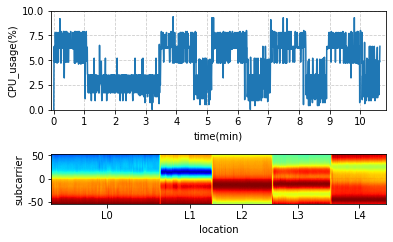

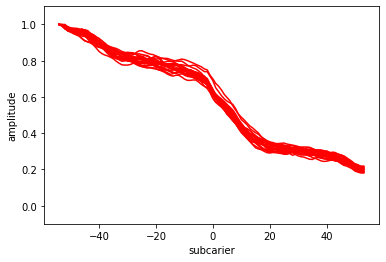

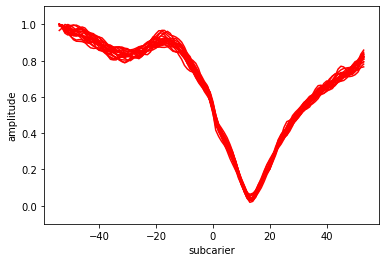

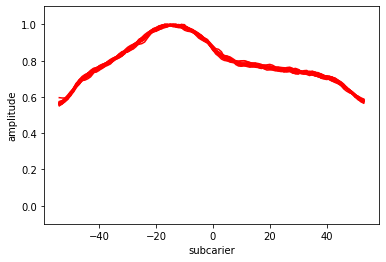

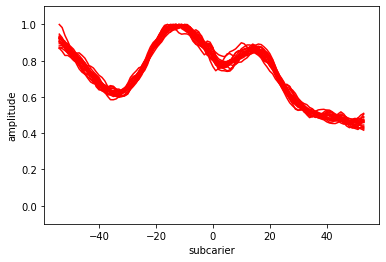

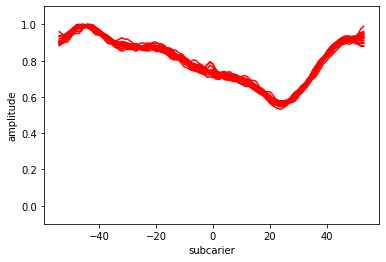

In [649]:
# csi_matrix1 = np.loadtxt(open("csi_data_test.csv", "rb"), delimiter=",", skiprows=1)

# no_sub = np.shape(csi_matrix1)[1]

# for i in range(65,90):
#     plt.plot(csi_matrix1[:,i])
# plt.ylim(0,1.05)
# plt.show()
index=[]

text_file = open("./exp1/client_cpu_5l.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]
for i in range(len(cpu_new)):
    index.append(10*i)


fig, (plot1,plot2) = plt.subplots(2,1)

plot1.plot(index,cpu_new)
plot1.grid(axis='both', color = '0.8', linestyle = '--')

plot1.set_ylim((0,10))
plot1.set_xlim((-100,13000))
plot1.set_ylabel('CPU_usage(%)')
plot1.set_xlabel('time(min)')
plot1.set_xticks([0,1200,2400,3600,4800,6000,7200,8400,9600,10800,12000],[0,1,2,3,4,5,6,7,8,9,10])


csi_matrix2 = np.loadtxt(open("./exp1/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)

# no_sub = np.shape(csi_matrix2)[1]

# for i in range(60,80):
#     plt.plot(csi_matrix2[:,i])
# plt.ylim(0,1.05)
# plt.show()

# fig, ax= plt.subplot()


plot2.imshow(np.transpose(csi_matrix2), cmap='jet' ,aspect='15.05',vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_xlabel('location')
plot2.set_xticks([1800,4500,6200,8000,10000],['L0','L1','L2','L3','L4'])
plot2.set_yticks([4,54,104],[-50,0,50])
plot2.invert_yaxis()

# plt.savefig('exp1_5l.png',dpi=500)
plt.show()



# csi_matrix = np.append(csi_matrix2[900:1000],csi_matrix2[900:1200],axis=0)

# np.savetxt("csi_data.csv", csi_matrix, delimiter=",")

# for i in range(20,40):
#     plt.plot(csi_matrix[:,i])
# plt.ylim(0,1.05)
# plt.show()

sub_index = []

for i in range(-54,54):
    sub_index.append(i)


for i in range(1800,1820):
    plt.plot(sub_index,csi_matrix2[i,:],'r')
    plt.ylabel('amplitude')
    plt.xlabel('subcarier')
    plt.ylim((-0.1,1.1))
# plt.savefig('exp1_l1csi.png',dpi=500)
plt.show()
for i in range(4500,4520):
    plt.plot(sub_index,csi_matrix2[i,:],'r')
    plt.ylabel('amplitude')
    plt.xlabel('subcarier')
    plt.ylim((-0.1,1.1))
# plt.savefig('exp1_l2csi.png',dpi=500)
plt.show()
for i in range(6200,6220):
    plt.plot(sub_index,csi_matrix2[i,:],'r')
    plt.ylabel('amplitude')
    plt.xlabel('subcarier')
    plt.ylim((-0.1,1.1))
# plt.savefig('exp1_l3csi.png',dpi=500)
plt.show()
for i in range(8000,8020):
    plt.plot(sub_index,csi_matrix2[i,:],'r')
    plt.ylabel('amplitude')
    plt.xlabel('subcarier')
    plt.ylim((-0.1,1.1))
# plt.savefig('exp1_l4csi.png',dpi=500)
plt.show()
for i in range(10000,10020):
    plt.plot(sub_index,csi_matrix2[i,:],'r')
    plt.ylabel('amplitude')
    plt.xlabel('subcarier')
    plt.ylim((-0.1,1.1))
# plt.savefig('exp1_l5csi.png',dpi=500)
plt.show()




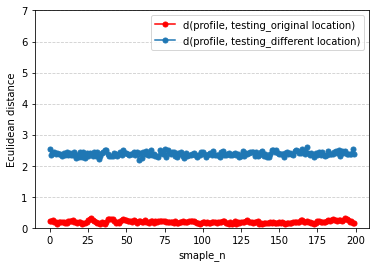

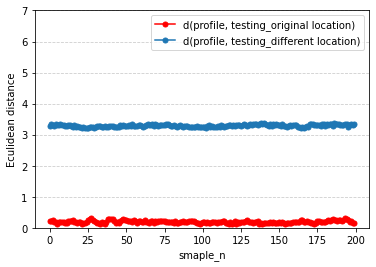

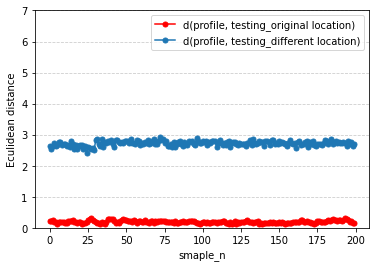

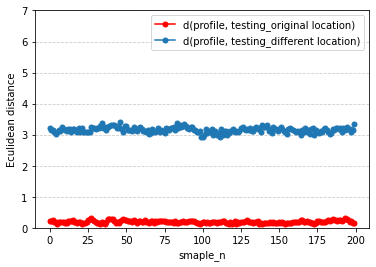

In [501]:
# nn = []
# distance = []
# result = []
# for i in range(1700,1900):
#     coff_matrix = np.corrcoef(csi_matrix2[i,:],csi_matrix2[i+300,:])
#     dis = dist(csi_matrix2[i,:],csi_matrix2[i+300,:])
#     coff = coff_matrix[0,1]
#     nn.append(coff)
#     distance.append(dis)
# r1 =sum(distance)/len(distance)
# print(r1)
# # print(sum(nn)/len(nn))


# nn = []
# distance = []
# for i in range(1700,1900):
#     coff_matrix = np.corrcoef(csi_matrix2[i,:],csi_matrix2[i+3000,:])
#     dis = dist(csi_matrix2[i,:],csi_matrix2[i+3000,:])
#     distance.append(dis)
#     coff = coff_matrix[0,1]
#     nn.append(coff)
# r2 =sum(distance)/len(distance)
# print(r2)
# # print(sum(nn)/len(nn))

# nn = []
# distance = []
# for i in range(1700,1900):
#     coff_matrix = np.corrcoef(csi_matrix2[i,:],csi_matrix2[i+4300,:])
#     coff = coff_matrix[0,1]
#     dis = dist(csi_matrix2[i,:],csi_matrix2[i+4300,:])
#     distance.append(dis)
#     nn.append(coff)
# r3 =sum(distance)/len(distance)
# print(r3)
# # print(sum(nn)/len(nn))

# nn = []
# distance = []
# for i in range(1700,1900):
#     coff_matrix = np.corrcoef(csi_matrix2[i,:],csi_matrix2[i+6200,:])
#     coff = coff_matrix[0,1]
#     dis = dist(csi_matrix2[i,:],csi_matrix2[i+6200,:])
#     distance.append(dis)
#     nn.append(coff)
# r4 =sum(distance)/len(distance)
# print(r4)
# # print(sum(nn)/len(nn))

# nn = []
# distance = []
# for i in range(1700,1900):
#     coff_matrix = np.corrcoef(csi_matrix2[i,:],csi_matrix2[i+8200,:])
#     coff = coff_matrix[0,1]
#     dis = dist(csi_matrix2[i,:],csi_matrix2[i+8200,:])
#     distance.append(dis)
#     nn.append(coff)
# r5 =sum(distance)/len(distance)
# print(r5)
# # print(sum(nn)/len(nn))

# plt.stem([r1,r2,r3,r4,r5])
# plt.ylim((-0.1,4))
# plt.ylabel('Eculidean distance')
# plt.xticks([0,1,2,3,4],['d (C0,C0)','d (C0,C1)','d (C0,C2)', 'd (C0,C3)','d (C0,C4)'])
# plt.grid(axis='y', color = '0.8', linestyle = '--')
# # plt.savefig('distance_5l.png', dpi=500)

# plt.show()


all_1 = []
for i in range(1500,1700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_original location)', marker = 'o',markersize = 5)

all = []
for i in range(4800,5000):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_different location)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('dif_loc1.png', dpi=500)
plt.show()

all_1 = []
for i in range(1500,1700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_original location)', marker = 'o',markersize = 5)

all = []
for i in range(6000,6200):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_different location)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('dif_loc2.png', dpi=500)
plt.show()

all_1 = []
for i in range(1500,1700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_original location)', marker = 'o',markersize = 5)

all = []
for i in range(8000,8200):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_different location)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('dif_loc3.png', dpi=500)
plt.show()

all_1 = []
for i in range(1500,1700):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all_1.append(dis)

plt.plot(all_1,'r', label = 'd(profile, testing_original location)', marker = 'o',markersize = 5)

all = []
for i in range(10000,10200):
    # coff_matrix = np.corrcoef(csi_matrix2[500,:],csi_matrix2[i,:])
    dis = dist(csi_matrix2[100,:],csi_matrix2[i,:])
    
    all.append(dis)

plt.plot(all,label = 'd(profile, testing_different location)',marker = 'o',markersize = 5)
plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,7))
plt.ylabel('Eculidean distance')
plt.xlabel('smaple_n')
plt.legend()
plt.savefig('dif_loc4.png', dpi=500)
plt.show()

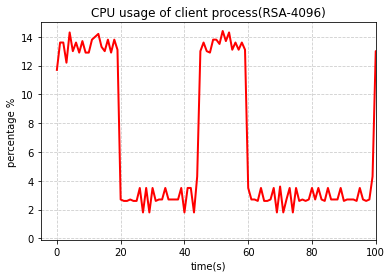

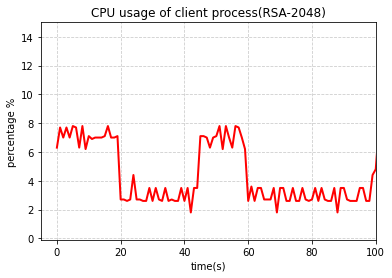

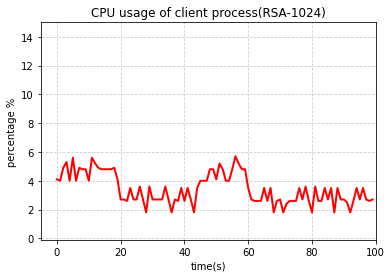

13.313333333333334
7.1
4.726666666666666
2.8100000000000005


In [344]:
text_file = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_128_20_asym.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]

text_file1 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/1024_128_20_asym.txt", "r")
cpu1 = text_file1.read().split('\n')
cpu_new1 = [float(x) for x in cpu1]

text_file2 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/4096_128_20_asym.txt", "r")
cpu2 = text_file2.read().split('\n')
cpu_new2 = [float(x) for x in cpu2]

# text_file2 = open("cpu_client_asym.txt", "r")
# cpu2 = text_file2.read().split('\n')
# cpu_new2 = [float(x) for x in cpu2]

plt.plot(cpu_new2, 'r', linewidth = 2)
plt.ylim((-0.1,15))
plt.xlim((-5,100))
plt.title('CPU usage of client process(RSA-4096)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,20,40,60,80,100],[0,10,20,30,40,50])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('4096_128_20_asym.png', dpi=500)
plt.show()

plt.plot(cpu_new, 'r', linewidth = 2)
plt.ylim((-0.1,15))
plt.xlim((-5,100))
plt.title('CPU usage of client process(RSA-2048)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
# plt.xticks([0,20,40,60,80,100],[0,10,20,30,40,50])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_128_20_asym.png', dpi=500)
plt.show()

plt.plot(cpu_new1, 'r', linewidth = 2)
plt.ylim((-0.1,15))
plt.xlim((-5,100))
plt.title('CPU usage of client process(RSA-1024)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
# plt.xticks([0,20,40,60,80,100],[0,10,20,30,40,50])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('1024_128_20_asym.png', dpi=500)
plt.show()

print(sum(cpu_new2[0:15])/len(cpu_new2[0:15]))
print(sum(cpu_new[0:15])/len(cpu_new[0:15]))
print(sum(cpu_new1[0:15])/len(cpu_new1[0:15]))
print(sum(cpu_new1[21:41])/len(cpu_new1[21:41]))

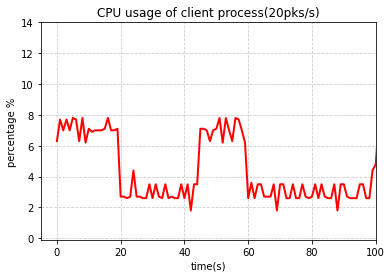

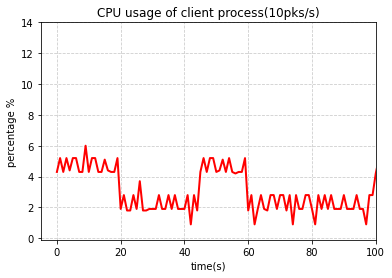

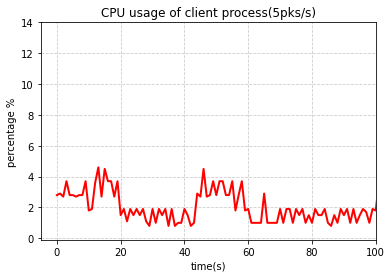

7.1
2.9000000000000012
4.779999999999999
2.1949999999999994
2.9533333333333336
1.4599999999999997


In [347]:
text_file2 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_128_20_asym.txt", "r")
cpu2 = text_file2.read().split('\n')
cpu_new2 = [float(x) for x in cpu2]

text_file = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_128_10_asym.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]

text_file1 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_128_5_asym.txt", "r")
cpu1 = text_file1.read().split('\n')
cpu_new1 = [float(x) for x in cpu1]


# text_file2 = open("cpu_client_asym.txt", "r")
# cpu2 = text_file2.read().split('\n')
# cpu_new2 = [float(x) for x in cpu2]

plt.plot(cpu_new2, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(20pks/s)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_128_20_asym_pk.png', dpi=500)
plt.show()

plt.plot(cpu_new, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(10pks/s)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_128_10_asym.png', dpi=500)
plt.show()

plt.plot(cpu_new1, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(5pks/s)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_128_5_asym.png', dpi=500)
plt.show()

print(sum(cpu_new2[0:15])/len(cpu_new2[0:15]))
print(sum(cpu_new2[21:41])/len(cpu_new2[21:41]))
print(sum(cpu_new[0:15])/len(cpu_new[0:15]))
print(sum(cpu_new[21:41])/len(cpu_new[21:41]))
print(sum(cpu_new1[0:15])/len(cpu_new1[0:15]))
print(sum(cpu_new1[21:41])/len(cpu_new1[21:41]))

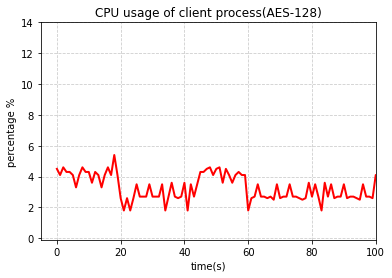

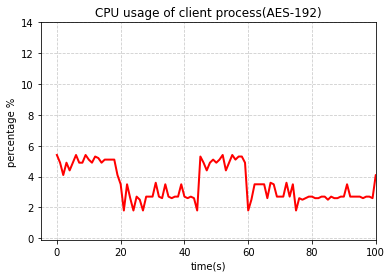

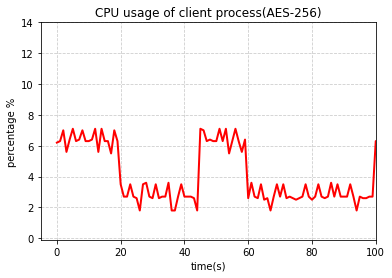

4.119999999999999
4.973333333333334
6.473333333333332
2.8000000000000003


In [346]:
text_file2 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_128_20_symm.txt", "r")
cpu2 = text_file2.read().split('\n')
cpu_new2 = [float(x) for x in cpu2]

text_file = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_192_20_symm.txt", "r")
cpu = text_file.read().split('\n')
cpu_new = [float(x) for x in cpu]

text_file1 = open("/Users/liangxintai/Desktop/Secure-Socket-Connection-main/muliti-para_compare/2048_256_20_symm.txt", "r")
cpu1 = text_file1.read().split('\n')
cpu_new1 = [float(x) for x in cpu1]


# text_file2 = open("cpu_client_asym.txt", "r")
# cpu2 = text_file2.read().split('\n')
# cpu_new2 = [float(x) for x in cpu2]

plt.plot(cpu_new2, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(AES-128)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_128_20_symm.png', dpi=500)
plt.show()

plt.plot(cpu_new, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(AES-192)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_192_20_symm.png', dpi=500)
plt.show()

plt.plot(cpu_new1, 'r', linewidth = 2)
plt.ylim((-0.1,14))
plt.xlim((-5,100))
plt.title('CPU usage of client process(AES-256)')
plt.ylabel('percentage %')
plt.xlabel('time(s)')
# plt.xticks([0,120,240,360,480,600],[0,1,2,3,4,5])
plt.grid(axis='both', color = '0.8', linestyle = '--')
# plt.legend()
plt.savefig('2048_256_20_symm.png', dpi=500)
plt.show()

print(sum(cpu_new2[0:15])/len(cpu_new2[0:15]))
print(sum(cpu_new[0:15])/len(cpu_new[0:15]))
print(sum(cpu_new1[0:15])/len(cpu_new1[0:15]))
print(sum(cpu_new1[21:41])/len(cpu_new1[21:41]))

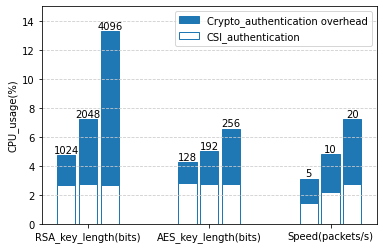

In [654]:
import matplotlib.pyplot as plt


labels = ['RSA_key_length(bits)', 'AES_key_length(bits)', 'Speed(packets/s)']
csione = [2.71, 2.80, 1.46]
csitwo = [2.73, 2.78, 2.21]
csithree = [2.69, 2.76, 2.78]

one = [4.73, 4.28, 3.13]
two = [7.24, 5.03, 4.79]
three = [13.32, 6.57, 7.21]



x = np.arange(len(labels))  # the label locations
width = 0.15       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

# rect1 = ax.bar(x - width*1.2, csione, width, label='CSI_authentication', color = 'w',edgecolor = 'tab:blue')
rect1 = ax.bar(x - width*1.2, one, width, label = 'Crypto_authentication overhead', color = 'tab:blue',edgecolor = 'tab:blue')
ax.bar_label(rect1, labels=['1024','128','5'])
rect1 = ax.bar(x - width*1.2, csione, width, label='CSI_authentication', color = 'w',edgecolor = 'tab:blue')

# rect2 = ax.bar(x , csitwo, width, color = 'w',edgecolor = 'tab:blue')
rect2 = ax.bar(x , two, width, color = 'tab:blue',edgecolor = 'tab:blue')
ax.bar_label(rect2, labels=['2048','192','10'])
rect2 = ax.bar(x , csitwo, width, color = 'w',edgecolor = 'tab:blue')

# rect3 = ax.bar(x + width*1.2, csithree, width, color = 'w',edgecolor = 'tab:blue')
rect3 = ax.bar(x + width*1.2, three, width, color = 'tab:blue',edgecolor = 'tab:blue')
ax.bar_label(rect3, labels=['4096','256','20'])
rect3 = ax.bar(x + width*1.2, csithree, width, color = 'w',edgecolor = 'tab:blue')


ax.set_ylabel('CPU_usage(%)')
ax.set_xticks(x, labels)
# ax.set_title('Scores by group and gender')
ax.legend()


plt.grid(axis='y', color = '0.8', linestyle = '--')
plt.ylim((0,15))
plt.savefig('CPU_compare.png', dpi=500)
plt.show()

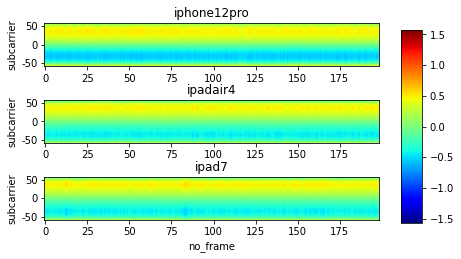

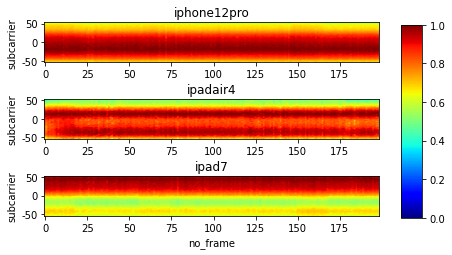

In [177]:
df1 = pd.read_csv('iphone12pro_40_s1_ph.csv')
phase_error_1 = df1.to_numpy()[0:200]
# print(np.shape(matrix1))
df2 = pd.read_csv('ipadair4_40_s1_ph.csv')
phase_error_2 = df2.to_numpy()[0:200]
# print(np.shape(matrix2))
df3 = pd.read_csv('ipad7_40_s1_ph.csv')
phase_error_3 = df3.to_numpy()[0:200]
# print(np.shape(matrix3))

fig, (plot1,plot2,plot3) = plt.subplots(3,1)

# plot1.plot(index,cpu_new)
# plot1.grid(axis='both', color = '0.8', linestyle = '--')
# csi_matrix1 = np.loadtxt(open("./exp2/csi_data_all_legal.csv", "rb"), delimiter=",", skiprows=1)

plot1.imshow(np.transpose(phase_error_1), cmap='jet' ,aspect='0.22',vmin=-np.pi/2,vmax=np.pi/2)
plot1.set_ylabel('subcarrier')
# plot1.set_xlabel('no_frame')
# plot1.set_xlim((0,3300))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot1.set_xticks([0,800,1600,2400,3200],[0,1,2,3,4])
plot1.set_yticks([8,58,108],[-50,0,50])
plot1.invert_yaxis()
plot1.set_title('iphone12pro')


# csi_matrix2 = np.loadtxt(open("./exp2/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


plot2.imshow(np.transpose(phase_error_2), cmap='jet' ,aspect='0.22',vmin=-np.pi/2,vmax=np.pi/2)
plot2.set_ylabel('subcarrier')
# plot2.set_xlabel('no_frame')
# plot2.set_xlim((0,9500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot2.set_yticks([8,58,108],[-50,0,50])
plot2.invert_yaxis()
plot2.set_title('ipadair4')

im=plot3.imshow(np.transpose(phase_error_3), cmap='jet' ,aspect='0.22',vmin=-np.pi/2,vmax=np.pi/2)
plot3.set_ylabel('subcarrier')
plot3.set_xlabel('no_frame')
# plot2.set_xlim((0,9500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot3.set_yticks([8,58,108],[-50,0,50])
plot3.invert_yaxis()
plot3.set_title('ipad7')

# plot4.imshow(np.transpose(phase_error_4), cmap='jet' ,aspect='0.20',vmin=-np.pi,vmax=np.pi)
# plot4.set_ylabel('subcarrier')
# plot4.set_xlabel('no_frame')
# # plot2.set_xlim((0,9500))
# # plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# # plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
# plot4.set_yticks([4,54,104],[-50,0,50])
# plot4.invert_yaxis()
# plot4.set_title('iphone11')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.150, 0.05, 0.67])
fig.colorbar(im,cax=cbar_ax)

fig.savefig('40_diffdev_ph.png',dpi=500,bbox_inches='tight')
plt.show()


df11 = pd.read_csv('iphone12pro_40_s1_amp.csv')
amplitude_1 = df11.to_numpy()[0:200]
# print(np.shape(matrix1))
df21 = pd.read_csv('ipadair4_40_s1_amp.csv')
amplitude_2 = df21.to_numpy()[0:200]
# print(np.shape(matrix2))
df31 = pd.read_csv('ipad7_40_s1_amp.csv')
amplitude_3 = df31.to_numpy()[0:200]

fig1, (plot11,plot21,plot31) = plt.subplots(3,1)

# plot1.plot(index,cpu_new)
# plot1.grid(axis='both', color = '0.8', linestyle = '--')
# csi_matrix1 = np.loadtxt(open("./exp2/csi_data_all_legal.csv", "rb"), delimiter=",", skiprows=1)

im = plot11.imshow(np.transpose(amplitude_1), cmap='jet' ,aspect='0.22',vmin=0,vmax=1)
plot11.set_ylabel('subcarrier')
# plot1.set_xlabel('no_frame')
# plot1.set_xlim((0,3300))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot1.set_xticks([0,800,1600,2400,3200],[0,1,2,3,4])
plot11.set_yticks([4,54,104],[-50,0,50])
plot11.invert_yaxis()
plot11.set_title('iphone12pro')


# csi_matrix2 = np.loadtxt(open("./exp2/csi_data_all.csv", "rb"), delimiter=",", skiprows=1)


im =plot21.imshow(np.transpose(amplitude_2), cmap='jet' ,aspect='0.22',vmin=0,vmax=1)
plot21.set_ylabel('subcarrier')
# plot2.set_xlabel('no_frame')
# plot2.set_xlim((0,9500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot21.set_yticks([4,54,104],[-50,0,50])
plot21.invert_yaxis()
plot21.set_title('ipadair4')

im = plot31.imshow(np.transpose(amplitude_3), cmap='jet' ,aspect='0.22',vmin=0,vmax=1)
plot31.set_ylabel('subcarrier')
plot31.set_xlabel('no_frame')
# plot2.set_xlim((0,9500))
# plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
plot31.set_yticks([4,54,104],[-50,0,50])
plot31.invert_yaxis()
plot31.set_title('ipad7')

# plot4.imshow(np.transpose(phase_error_4), cmap='jet' ,aspect='0.20',vmin=-np.pi,vmax=np.pi)
# plot4.set_ylabel('subcarrier')
# plot4.set_xlabel('no_frame')
# # plot2.set_xlim((0,9500))
# # plot2.set_xticks([0,950,1950,2900,3850],['0','1','2','3','4'])
# # plot2.set_xticks([1000,3000,4800,6800,8600],['L0','L1','L2','L3','L4'])
# plot4.set_yticks([4,54,104],[-50,0,50])
# plot4.invert_yaxis()
# plot4.set_title('iphone11')

fig1.subplots_adjust(right=0.9)
cbar_ax1 = fig1.add_axes([0.95, 0.160, 0.05, 0.67])
fig1.colorbar(im,cax=cbar_ax1)
# fig1.subplots_adjust(right=0.8)
fig1.savefig('40_diffdev_amp.png',dpi=500,bbox_inches='tight')
plt.show()

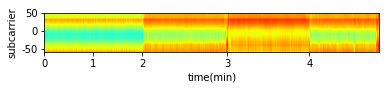

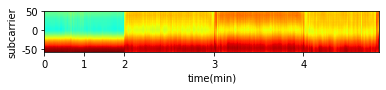

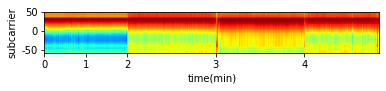

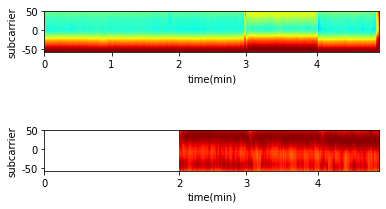

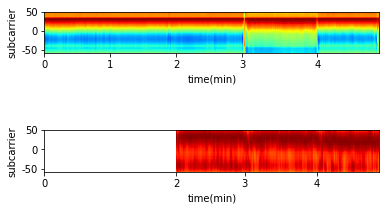

In [329]:
df0 = pd.read_csv('./multiuser_exp/multiusr_all.csv')
df1 = pd.read_csv('./multiuser_exp/multiusr_user1.csv')
df2 = pd.read_csv('./multiuser_exp/multiusr_user2.csv')
df3 = pd.read_csv('./multiuser_exp/multiusr_user3.csv')
df13 = pd.read_csv('./multiuser_exp/multiusr_user13.csv')
df23 = pd.read_csv('./multiuser_exp/multiusr_user23.csv')


multi_amp_all = df0.to_numpy()
multi_amp_1 = df1.to_numpy()
multi_amp_2 = df2.to_numpy()
multi_amp_3 = df3.to_numpy()
multi_amp_13 = df13.to_numpy()
multi_amp_23 = df23.to_numpy()


plt.imshow(np.transpose(multi_amp_all), cmap='jet' ,aspect=18, vmin=0,vmax=1)
plt.ylabel('subcarrier')
plt.yticks([8,58,108],[-50,0,50])
plt.xlabel('time(min)')
plt.xticks([0,2475,4950,9250,13400],[0,1,2,3,4])
plt.gca().invert_yaxis()
plt.title()
plt.savefig('./multiuser_exp/multi_csi_all.png', dpi=500)
plt.show()

plt.imshow(np.transpose(multi_amp_13), cmap='jet' ,aspect=11, vmin=0,vmax=1)
plt.ylabel('subcarrier')
plt.yticks([8,58,108],[-50,0,50])
plt.xlabel('time(min)')
plt.xticks([0,1175,2350,5000,7640],[0,1,2,3,4])
plt.gca().invert_yaxis()
plt.savefig('./multiuser_exp/multi_csi_13.png', dpi=500)
plt.show()

plt.imshow(np.transpose(multi_amp_23), cmap='jet' ,aspect=12, vmin=0,vmax=1)
plt.ylabel('subcarrier')
plt.yticks([8,58,108],[-50,0,50])
plt.xlabel('time(min)')
plt.xticks([0,1325,2650,5500,8340],[0,1,2,3,4])
plt.gca().invert_yaxis()
plt.savefig('./multiuser_exp/multi_csi_23.png', dpi=500)
plt.show()


fig1, (plot1,plot3) = plt.subplots(2,1)

# plot0.imshow(np.transpose(multi_amp_all), cmap='jet' ,aspect=18.5, vmin=0,vmax=1)
# plot0.set_ylabel('subcarrier')
# plot0.set_yticks([8,58,108],[-50,0,50])
# plot0.invert_yaxis()

# plot13.imshow(np.transpose(multi_amp_13), cmap='jet' ,aspect=9.5, vmin=0,vmax=1)
# plot13.set_ylabel('subcarrier')
# plot13.set_yticks([8,58,108],[-50,0,50])
# plot13.invert_yaxis()

# plot23.imshow(np.transpose(multi_amp_23), cmap='jet' ,aspect=9.5, vmin=0,vmax=1)
# plot23.set_ylabel('subcarrier')
# plot23.set_yticks([8,58,108],[-50,0,50])
# plot23.invert_yaxis()

plot1.imshow(np.transpose(multi_amp_1), cmap='jet' ,aspect=7, vmin=0,vmax=1)
plot1.set_ylabel('subcarrier')
plot1.set_yticks([8,58,108],[-50,0,50])
plot1.set_xlabel('time(min)')
plot1.set_xticks([0,1240,2480,3720,5040],[0,1,2,3,4])
plot1.invert_yaxis()


# plot2.imshow(np.transpose(multi_amp_2), cmap='jet' ,aspect=8, vmin=0,vmax=1)
# plot2.set_ylabel('subcarrier')
# plot2.set_yticks([8,58,108],[-50,0,50])
# plot2.invert_yaxis()

plot3.imshow(np.transpose(multi_amp_3), cmap='jet' ,aspect=7, vmin=0,vmax=1)
plot3.set_ylabel('subcarrier')
plot3.set_yticks([8,58,108],[-50,0,50])
plot3.set_xlabel('time(min)')
plot3.set_xticks([-2480,0,1240,2550],[0,2,3,4])
plot3.invert_yaxis()


fig1.savefig('./multiuser_exp/multi_csi_1&3.png', dpi=500)

# fig.tight_layout()

fig2, (plot2,plot3) = plt.subplots(2,1)

plot2.imshow(np.transpose(multi_amp_2), cmap='jet' ,aspect=8, vmin=0,vmax=1)
plot2.set_ylabel('subcarrier')
plot2.set_yticks([8,58,108],[-50,0,50])
plot2.set_xlabel('time(min)')
plot2.set_xticks([0,1390,2780,4170,5750],[0,1,2,3,4])
plot2.invert_yaxis()

plot3.imshow(np.transpose(multi_amp_3), cmap='jet' ,aspect=7, vmin=0,vmax=1)
plot3.set_ylabel('subcarrier')
plot3.set_yticks([8,58,108],[-50,0,50])
plot3.set_xlabel('time(min)')
plot3.set_xticks([-2400,0,1240,2550],[0,2,3,4])
plot3.invert_yaxis()

fig2.savefig('./multiuser_exp/multi_csi_2&3.png', dpi=500)


